In [35]:
# importing dependencies
from splinter import Browser
from bs4 import BeautifulSoup as bs
from webdriver_manager.chrome import ChromeDriverManager
import requests
import pandas as pd


In [36]:
# setting up splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [37]:
# website URL to scrape
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)
html = browser.html


In [38]:
# scraping page into bs
html = browser.html
soup = bs(html, "html.parser")

In [39]:
# examining results
results = soup.find('table', class_='table')

In [40]:
for query in results:
    print(query)



<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>74

In [41]:
headers = soup.find_all('th')
info = soup.find_all('tr', class_='data-row')

In [42]:
# creating empty lists
table_headers = []
id = []
terrestrial_date = []
sol = []
ls = []
month = []
min_temp = []
pressure = []


In [43]:
# table headers
for header in headers:
    table_headers.append(header.text)

# retrieving data
for i in info:
   # appending id
    mars_id = i.find('td')
    id.append(int(mars_id.text))
    
    # appending terrestial dates
    terrestrial_date.append(mars_id.find_next_sibling('td').text)
    mars_id = mars_id.find_next_sibling('td')
    
    # appending sol
    sol.append(int(mars_id.find_next_sibling("td").text))
    mars_id = mars_id.find_next_sibling("td")
    
    # appending ls
    ls.append(int(mars_id.find_next_sibling("td").text))
    mars_id=mars_id.find_next_sibling('td')
    
    # appending month
    month.append(int(mars_id.find_next_sibling("td").text))
    mars_id = mars_id.find_next_sibling("td")
    
    # appending min_temp
    min_temp.append(float(mars_id.find_next_sibling("td").text))
    mars_id = mars_id.find_next_sibling("td")
    
    # appending pressure
    pressure.append(float(mars_id.find_next_sibling("td").text))



In [44]:
# creating dataframe
mars_df = pd.DataFrame(columns = table_headers)
mars_df["id"] = id
mars_df["terrestrial_date"] = terrestrial_date
mars_df["sol"] = sol
mars_df["ls"] = ls
mars_df["month"] = month
mars_df["min_temp"] = min_temp
mars_df["pressure"] = pressure
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [45]:
# checking the data types
dtypes = mars_df.dtypes
print(dtypes)

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object


In [46]:
# changing terrestrial_date data type
mars_df = mars_df.astype({'terrestrial_date':'datetime64'})

In [47]:
# confirming data type change
dtypes = mars_df.dtypes
print(dtypes)

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


In [48]:
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


## Questions

### 1. How many months exist on Mars?

In [50]:
max_month = mars_df["month"].max()
print(f'There are {max_month} months on Mars.')

There are 12 months on Mars.


### 2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?

In [52]:
data_days = mars_df["sol"].max() - mars_df["sol"].min() + 1
print(f'There are {data_days} Martian days of data in this dataset.')

There are 1968 Martian days of data in this dataset.


### 3. What are the coldest and the warmest months on Mars (at the location of Curiosity)?

From the data below the 3rd month is the coldest and the 8th month is the warmest.


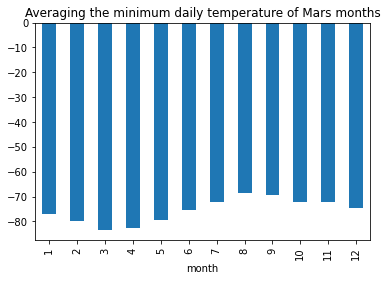

In [63]:
# finding the average the minimum daily temperature for all of the months
avg_temp = mars_df.groupby(['month'])['min_temp'].mean()
print(f'From the data below the 3rd month is the coldest and the 8th month is the warmest.')

# plotting the results as a bar chart
avg_temp.plot.bar(x='Month on Mars', y='Average Minimum Temp', title='Averaging the minimum daily temperature of Mars months');

### 4. Which months have the lowest and the highest atmospheric pressure on Mars?

From the data below the 6th month is the lowest and the 9th month is the highest in terms of atmospheric pressure.


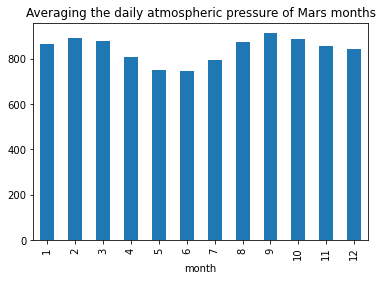

In [64]:
# finding the average the daily atmospheric pressure of all the months
avg_pressure = mars_df.groupby(["month"])["pressure"].mean()
print(f'From the data below the 6th month is the lowest and the 9th month is the highest in terms of atmospheric pressure.')

# plotting the results as a bar chart
avg_pressure.plot.bar(x='Month on Mars', y='Average Pressure', title='Averaging the daily atmospheric pressure of Mars months');

### 5. About how many terrestrial (Earth) days exist in a Martian year?

The data is across 2021 Earth days and from the plot below it seems like there are 2.5 years worth of Martian data
With this information I estimate that there are 808.4 Earth days in a Martian year


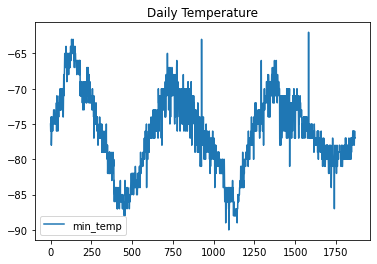

In [65]:
start_date_earth = mars_df['terrestrial_date'].min()
end_date_earth = mars_df['terrestrial_date'].max()
earth_days = (end_date_earth - start_date_earth).days
min_temp = mars_df[['min_temp']]
print(f'The data is across {earth_days} Earth days and from the plot below it seems like there are 2.5 years worth of Martian data')
martian_years = 2.5
earth_days_in_martian_year = earth_days/2.5
print(f'With this information I estimate that there are {earth_days_in_martian_year} Earth days in a Martian year')
min_temp.plot(title='Daily Temperature');

In [67]:
# exporting data into a csv
output_csv = 'output_data/mars_data.csv'

mars_df.to_csv(output_csv,header=True,index=False)